### RandomForestRegressor - Ensemblee
Random forest is a supervised machine learning algorithm that can be used for both classification and regression tasks. It works by constructing a large number of decision trees during the training phase, and then combining the predictions made by each individual tree to produce a final prediction.

In a random forest regressor, each tree in the forest makes a prediction based on the features in the training data, and the final prediction is the average of the predictions made by all the trees in the forest. This process helps to reduce the variance in the predictions made by the model, which can improve the overall accuracy of the model.

One key feature of the random forest algorithm is that it randomly selects a subset of features to use in each decision tree. This helps to prevent overfitting, which occurs when a model becomes too closely fitted to the training data and performs poorly on new, unseen data. By using a random subset of features in each tree, the random forest model is able to generalize better to new data.


Disadvantage of Random Forest is computational complexity since all the trees in the forest have to make a prediction, among all the votes we choose one.
Compared to Decision Tree it is much more difficult to interpret visually.
Advantages: It suffers less from overfitting since it does the average among all predictions, cancelling out the bias. Can be used as an algorithm for feature selection.


# Initial Testing
Trying the algorithm with parameters similar to those obtained from the decision Tree

In [1]:
import warnings
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

#muting warnings
warnings.filterwarnings('ignore')

X_train = pd.read_csv('x_train_preprocessed.csv')
X_test = pd.read_csv('x_test_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')
y_test = pd.read_csv('y_test_preprocessed.csv')

rf_model = RandomForestRegressor(max_leaf_nodes=43, max_depth=9, min_samples_leaf=11, criterion='mae', max_features='auto', bootstrap=True, n_jobs=-1 )
rf_model.fit(X_train,y_train)
print("TEST: ",rf_model.score(X_test,y_test))

TEST:  0.9082467261111582


# Testing and reasoning
Based on our knowledge of the 'algorithm and the information observed from the decisionTree analysis, until we obtain observations that satisfy us.

TRAIN:  0.9229556489565502
TEST:  0.9176081031015361


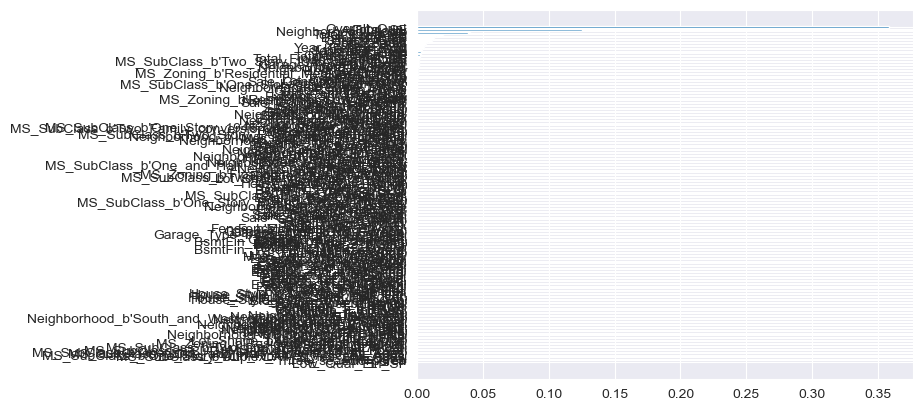

In [2]:
from matplotlib import pyplot as plt

rf_model = RandomForestRegressor(max_leaf_nodes=70, max_depth=10, min_samples_leaf=5, criterion='mae', max_features='auto', bootstrap=True, n_jobs=-1 )
rf_model.fit(X_train,y_train)
print("TRAIN: ",rf_model.score(X_train,y_train))
print("TEST: ",rf_model.score(X_test,y_test))

#Create image based on feature_importances
f_i = list(zip(X_train.columns,rf_model.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.rcParams["figure.figsize"]=250,250
plt.show()

# Reasoning after testing multiple parameters
- After several tests we can see how the various trees can be made more accurate since the nature of the random forest regressor goes to reduce overfitting through the average of the various trees.
- In fact we notice how higher accuracy can be achieved with lower overfitting by slightly raising the number of max depth and max leaf nodes and reducing the samples needed to create a new leaf.
- Thus taking advantages of the nature of RandomForest.

# Removing components of custom feature ( Similar to Decision Tree)

In [3]:
oh_neighbor = []
for col in X_train.columns:
    if 'Neighborhood_b' in col:
        oh_neighbor.append(col)

X_train.drop(columns=oh_neighbor, inplace=True)
X_test.drop(columns=oh_neighbor, inplace=True)

porch = ['Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch']
surface = ['Total_Finished_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Garage_Area']
baths = ['Full_Bath', 'Half_Bath', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath']

X_train.drop(columns=porch, inplace=True)
X_test.drop(columns=porch, inplace=True)

X_train.drop(columns=surface, inplace=True)
X_test.drop(columns=surface, inplace=True)

X_train.drop(columns=baths, inplace=True)
X_test.drop(columns=baths, inplace=True)

rf_model = RandomForestRegressor(max_leaf_nodes=70, max_depth=10, min_samples_leaf=5, criterion='mae', max_features='auto', bootstrap=True, n_jobs=-1 )
rf_model.fit(X_train,y_train)
print("TRAIN: ",rf_model.score(X_train,y_train))
print("TEST: ",rf_model.score(X_test,y_test))

TRAIN:  0.9231321687716705
TEST:  0.9209663430611782


- Observe that the removed variables were not significant for model learning; in fact, we note a slight improvement on the overfitting side.

In [4]:
rf_model = RandomForestRegressor(max_leaf_nodes=70, max_depth=10, min_samples_leaf=5, criterion='mae', max_features='sqrt', bootstrap=True, n_jobs=-1, n_estimators=100 )
rf_model.fit(X_train,y_train)
print("TRAIN: ",rf_model.score(X_train,y_train))
print("TEST: ",rf_model.score(X_test,y_test))

TRAIN:  0.8795231242150737
TEST:  0.8897018386485049


# Choosing number of features
Note how by using only the best sqrt (of n features) the performance of the estimation of the model is worse, from this observation we can guess that almost all the features in the dataset add information to the model

# Se vogliamo da aggiungere hyperparameter tuning.

In [5]:

from sklearn.model_selection import GridSearchCV

parameters ={"criterion":["mae"],
            "max_depth" : range(1,13),
            "min_samples_leaf":range(1,16),
            "max_features":['auto'],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
            }




reg_decision_model= RandomForestRegressor()
reg_decision_model.fit(X_train,y_train)

tuning_model=GridSearchCV(
    reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=5,
    verbose=3,n_jobs= -1)

tuning_model.fit(X_train,y_train)
print(tuning_model.bestparams)
print(tuning_model.bestscore)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


KeyboardInterrupt: 